In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def find_neighbors(data, index, eps):
    neighbors = []
    for i, point in enumerate(data):
        if euclidean_distance(data[index], point) < eps:
            neighbors.append(i)
    return neighbors

def dbscan(data, eps, min_samples):
    labels = np.full(len(data), -1)  # Initialize labels as noise (-1)
    cluster_id = 0

    for i, point in enumerate(data):
        if labels[i] != -1:  # Skip if already assigned to a cluster
            continue

        neighbors = find_neighbors(data, i, eps)

        if len(neighbors) < min_samples:
            labels[i] = 0  # Mark as noise
        else:
            cluster_id += 1
            labels[i] = cluster_id

            for neighbor in neighbors:
                if labels[neighbor] == -1:
                    labels[neighbor] = cluster_id

                    new_neighbors = find_neighbors(data, neighbor, eps)
                    if len(new_neighbors) >= min_samples:
                        neighbors.extend(new_neighbors)

    return labels

In [4]:
# Generate synthetic data
from sklearn.datasets import make_blobs 
data, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

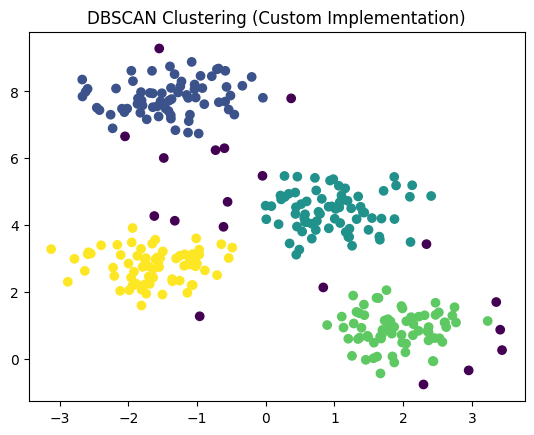

In [5]:
# Apply your custom DBSCAN function
eps = 0.5
min_samples = 5
labels = dbscan(data, eps, min_samples)

# Plot the results
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.title("DBSCAN Clustering (Custom Implementation)")
plt.show()